***
## <center> Exploratory Data Analysis
### <center> Import, cleaning, and exploration of data
***


In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
from sklearn import preprocessing

In [244]:
# importing player stats for attackers and midfielders.
#player_stats = pd.read_csv('/Users/kristianmadslangrud/Desktop/GitHub/machineLearningExamProject/player_stats_combined.csv')
player_stats = pd.read_csv('player_stats_combined.csv')

In [245]:
# Checking shape of dataframe
player_stats.shape

(5764, 44)

In [246]:
# Checking dataframe for datatypes and missing values.
player_stats.info()
# We have no missing values in the dataset. 
# object: name, country, birthDate, teamName, leagueName, preferredFoot
# bool: onLoan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   5764 non-null   object 
 1   playerId               5764 non-null   int64  
 2   marketValueEUR         5764 non-null   int64  
 3   country                5764 non-null   object 
 4   birthDate              5764 non-null   object 
 5   teamName               5764 non-null   object 
 6   teamId                 5764 non-null   int64  
 7   leagueName             5764 non-null   object 
 8   leagueId               5764 non-null   int64  
 9   onLoan                 5764 non-null   bool   
 10  height                 5764 non-null   int64  
 11  preferredFoot          5764 non-null   object 
 12  goals                  5764 non-null   int64  
 13  assists                5764 non-null   int64  
 14  games                  5764 non-null   int64  
 15  star

In [247]:
# Retrieving basic statistical measures for dataframe.
description_f22 = player_stats.iloc[:, :24].describe()
description_l22 = player_stats.iloc[:, 24:].describe()

description_l22

# We can see that for some features, height for instance, there's a minimum value of 0 - which dosen't make sense. We could've imputed values here, it's however dropped because we believe it will have little impact on the target value
# Additionally, we see little benefit in having features for games, startedGames, and minutesPlayed - so we only keep minutesPlayed feature.
# We drop yellowCards and redCards since we believe it will have little affect on target value, and because there are small differences in scale between min and max values. 
# xG, xGOT and xG_nonPenalty measures are quite similar, so we decide to only keep xG_nonPenalty as penalties will be dependent on the team the player belongs to, and we already have a team feature.
# Penalty goals will be included in the goal feature, so we drop this. 
# The shots and shotsOnTarget features are quite similar, so we drop the shotsOnTarget feature. 
# accuratePasses, passAccuracy, accurateLongBalls, longBallAccuracy are all very similar features. We keep passes since this will be applicable to the most players. Long balls will also be incorporated in passes feature.
# successfulCrosses and crossAccuracy are dropped due to the data description suggesting a vast amount of players with zero or few crosses (25% have 1 or less).
# Dribbles and dribblesSuccessRate are similar measures. to not overemphasize players who have attempted few dribbles, we drop the dribblesSuccessRate features.
# touches and touchesOppositionBox cover similar measures, so only touches is kept.
# dispossessed is dropped due to a high standard deviation and the distribution of data (with a median less than the mean) suggesting skewness.
# foulsWon, aerialsWon, aerialsWonPct, foulsCommitted, possessionWonFinal3rd are more relevant to defensive players. considering that this research mostly considers offensive players, and some features (aerialsWon,foulsWon) having substantial differences in mean and median - indicating skewness, these features are also dropped.

,shots,shotsOnTarget,xA,accuratePasses,passAccuracy,accurateLongBalls,longBallAccuracy,chancesCreated,successfulCrosses,crossAccuracy,dribbles,dribblesSuccessRate,touches,touchesOppositionBox,dispossesed,foulsWon,aerialsWon,aerialsWonPct,foulsComitted,possessionWonFinal3rd
count,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000
mean,25.684768,9.183033,1.354526,406.712179,76.645194,23.083102,50.455344,17.637925,7.373005,20.772137,14.458709,48.192627,772.640701,43.848022,16.536433,19.777585,19.786260,40.649133,19.417939,8.456627
std,22.203835,9.201429,1.733247,370.615626,8.632404,28.730334,19.571173,16.092864,11.444333,16.692385,14.125409,17.822337,570.215171,41.875970,13.224128,15.628722,25.930608,16.616038,13.808965,6.816987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,3.000000,0.040000,140.000000,71.600000,5.000000,40.000000,6.000000,1.000000,9.100000,5.000000,39.500000,330.000000,13.000000,7.000000,8.000000,5.000000,30.800000,9.000000,3.000000
50%,20.000000,6.000000,0.750000,295.000000,77.800000,13.000000,50.750000,13.000000,3.000000,20.700000,10.000000,49.200000,649.500000,31.000000,13.000000,16.000000,12.000000,41.200000,17.000000,7.000000
75%,36.000000,13.000000,1.960000,566.000000,82.900000,31.000000,62.500000,24.000000,9.000000,29.200000,20.000000,57.700000,1080.250000,63.000000,23.000000,28.000000,24.000000,50.800000,27.000000,12.000000
max,172.000000,69.000000,13.310000,3618.000000,100.000000,288.000000,100.000000,123.000000,148.000000,100.000000,145.000000,100.000000,4315.000000,322.000000,109.000000,118.000000,587.000000,100.000000,98.000000,59.000000


In [248]:
# Checking for data imbalance in preferredFoot and onLoan columns
player_stats['preferredFoot'].value_counts() # Right: 3526, Left: 1053, Both: 286, 0: 899 -- coulumn is dropped due to missing values and data imbalance
player_stats['onLoan'].value_counts() #False: 4849, True: 915. quite a lot of data imbalance

onLoan
False    4849
True      915
Name: count, dtype: int64

In [249]:
columns_to_keep = ['name','playerId','marketValueEUR','country','birthDate','leagueId','leagueName','goals',
                   'assists','minutesPlayed','avgRating','xG_nonPenalty','shots','xA','accuratePasses','chancesCreated',
                   'dribbles','touches']
slice_player_stats = player_stats[columns_to_keep]

In [250]:
# Creating column to determine if a player is an attacker or not. 
#fot_mob_attackers = pd.read_csv('/Users/kristianmadslangrud/Desktop/GitHub/machineLearningExamProject/player_stats_attackers.csv') # csv file containing only attackers
fot_mob_attackers = pd.read_csv('player_stats_attackers.csv')
slice_player_stats['is_attacker'] = slice_player_stats['playerId'].isin(fot_mob_attackers['playerId'])

#Check if code worked as intended
slice_player_stats['is_attacker'].value_counts()

/var/folders/z8/_8mthtnj5xj0lx776mdtsrpr0000gn/T/ipykernel_52092/500553566.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slice_player_stats['is_attacker'] = slice_player_stats['playerId'].isin(fot_mob_attackers['playerId'])


is_attacker
False    3173
True     2591
Name: count, dtype: int64

In [251]:
# We observe that the marketValueEUR is = 0 for 688 players. This is due to them not having a marketvalue on fotMob, we remove these rows

slice_player_stats = slice_player_stats[player_stats['marketValueEUR'] != 0]
slice_player_stats.shape

# Alternative: impute the average marketValueEUR for other players in the same position and league. 
# Calculate the mean for each group excluding zero values
#avg_values = slice_player_stats.groupby(['leagueId','is_attacker'])['marketValueEUR'].mean()
#avg_values

(5076, 19)

In [252]:
count_birth_date = slice_player_stats['birthDate'].value_counts()['0001-01-01T00:00:00.000Z'] # we observe that 3 records have the following value for birthDate


# Having a look at these records
filtered_data = slice_player_stats[slice_player_stats['birthDate'] == '0001-01-01T00:00:00.000Z']

# We deem that these three records will have little impact on our final target value, so these 3 rows are dropped
slice_player_stats = slice_player_stats[player_stats['birthDate'] != '0001-01-01T00:00:00.000Z']

/var/folders/z8/_8mthtnj5xj0lx776mdtsrpr0000gn/T/ipykernel_52092/2413787261.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  slice_player_stats = slice_player_stats[player_stats['birthDate'] != '0001-01-01T00:00:00.000Z']


In [253]:
# Creating an 'age' derived from birthDate, and dropping birthDate.

# Calculate age
current_date = dt.datetime.now()
slice_player_stats['birthDate'] = pd.to_datetime(slice_player_stats['birthDate'].str[:10], format='%Y-%m-%d', errors='coerce')
slice_player_stats['age'] = slice_player_stats['birthDate'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))

# drop birthDate
slice_player_stats = slice_player_stats.drop('birthDate', axis=1)

In [254]:
# Retrieving unique league_ids
slice_player_stats['leagueId'].unique()

# We've observed that some records have same leagueID and different leagueName (due to knockout stages, qualifying rounds, etc. )
# Creating a dictionary of actual league names and corresponding id. 
league_dict = {113: 'Australian A-League',47: 'English Premier League',53: 'French Ligue 1',108: 'English League One',54: 'German Bundesliga',48: 'English Championship',55: 'Italian Serie A',
               196: 'Polish Ekstraklasa',87: 'Spanish La Liga',173: 'Slovenian Prva Liga',71: 'Turkish Super Lig',46: 'Danish Superligaen',57: 'Netherlands Eredivisie',69: 'Swizz Super League',
               61: 'Liga Portugal',111: 'Netherlands Eerste Divisie',182: 'Serbian Super Liga',121: 'Costa Rican Primera Division',441: 'Ukranian Premier League',270: 'Bulgarian First Professional League',
               208: 'German 3. Liga',189: 'Romanian Liga I',9123: 'Russian Second League',230: 'Mexican Liga MX',10272: 'Brazilian Carioca Taca Guanabara',38: 'Austrian Bundesliga',110: 'French Ligue 2',
               512: 'German Regionalliga',63: 'Russian Premier League',64: 'Scottish Premiership',252: 'Croatian HNL',9116: 'South-Korean K League 2',40: 'Belgian First Division A',146: 'German 2. Bundesliga',
               163: 'Swizz Challenge League',140: 'Spanish La Liga 2',135: 'Greek Super League 1',274: 'Colombian Primera A',9125: 'Colombian Primera B',536: 'Saudi Pro League',86: 'Italian Serie B',
               109: 'English League Two',10274: 'Brazilian Gaucho'}


# Creating a dictionary with leagueName and their score. Scores are retrieved from: https://www.teamform.com/en/league-ranking/world (03/05/2024)
league_score_dict = {'English Premier League': 93.6,'Spanish La Liga': 91.3,'German Bundesliga': 90.3,'Italian Serie A': 89.5,'French Ligue 1': 85.5,'Liga Portugal': 84.9,'Turkish Super Lig': 80.8,
                     'Greek Super League 1': 80.1,'Mexican Liga MX': 79.8,'Russian Premier League': 79.6,'Colombian Primera A': 78.6,'Belgian First Division A': 78.1,'Netherlands Eredivisie': 78,
                     'German 2. Bundesliga': 77.5,'Spanish La Liga 2': 77.0,'Swizz Super League': 76.9,'English Championship': 76.1,'Brazilian Carioca Taca Guanabara': 75.4,'Austrian Bundesliga': 74.9,
                     'Italian Serie B': 74.8,'Polish Ekstraklasa': 74.1,'Romanian Liga I': 72.9,'French Ligue 2': 71.7,'South-Korean K League 2': 61.5,'Costa Rican Primera Division': 71.2,'German Regionalliga': 62.3,
                     'Bulgarian First Professional League': 70.2,'Colombian Primera B': 69.4,'Ukranian Premier League': 69.2,'Australian A-League': 69.0,'Scottish Premiership': 68.4,'English League One': 66.9,
                     'Saudi Pro League': 66.6,'Slovenian Prva Liga': 65.3,'Swizz Challenge League': 65.1,'German 3. Liga': 70.4,'Netherlands Eerste Divisie': 60.3,'English League Two': 59.3,'Serbian Super Liga': 70.8,
                     'Russian Second League': 50.1,'Brazilian Gaucho':85.6,'Danish Superligaen':78.0,'Croatian HNL':77.0}



In [255]:
# We've identified the following cups, and youth leagues in our df. we'll check how many times they occur. 
#9807 - UEFA Nations League B, 9806 - UEFA Nations League A, 9808 - UEFA Nations League C, 9514 - The Atlantic Cup, 142 - EFL Trophy, 297 - CONCACAF Champions Cup

league_ids_to_count = [9807, 9806, 9808, 9514, 142, 297, 9084]

# Count occurrences of each leagueId
counts = slice_player_stats['leagueId'].value_counts()

# Filter the counts to only include the specific leagueIds
filtered_counts = counts[counts.index.isin(league_ids_to_count)]

# Print the counts
print(filtered_counts)
print(filtered_counts.sum())

#Since there's only 147 players in total belonging to these cups, we'll drop these records
slice_player_stats = slice_player_stats[~slice_player_stats['leagueId'].isin(league_ids_to_count)]

leagueId
297     70
9807    25
9806    22
9808    17
9514    11
9084     1
142      1
Name: count, dtype: int64
147


In [256]:
# Updating leagueName to correct values from dictionary.
slice_player_stats['leagueName'] = slice_player_stats['leagueId'].map(league_dict)

# Creating a new column, leagueScore, which maps the league's ranking towards its leagueName
slice_player_stats['leagueScore'] = slice_player_stats['leagueName'].map(league_score_dict)

#Ensuring that the code worked as intended and didn't return any missing values.
slice_player_stats.isnull().sum() # No missing values in our dataframe.

name              0
playerId          0
marketValueEUR    0
country           0
leagueId          0
leagueName        0
goals             0
assists           0
minutesPlayed     0
avgRating         0
xG_nonPenalty     0
shots             0
xA                0
accuratePasses    0
chancesCreated    0
dribbles          0
touches           0
is_attacker       0
age               0
leagueScore       0
dtype: int64

In [257]:
# We further observe that some players have values populated for statistics, without having playing any minutes.
# To ensure data consistency we drop all players that've played less than 90 min (one full game)
count_minutes_over_90 = (slice_player_stats['minutesPlayed'] > 90).sum() # We observe that 4671 players have played more than 90 minutes in our dataset. 

player_stats_final = slice_player_stats[slice_player_stats['minutesPlayed'] > 90]

In [258]:
# We observe that some players have avgRating = 0, even though they've played over 90 minutes. 
player_stats_final.describe()

# Lets look at these records
# Having a look at these records
zero_rating = player_stats_final[player_stats_final['avgRating'] == 0.0] # We see that it's only 14 records in smaller leagues, so we decide to drop them. 
player_stats_final = player_stats_final[player_stats_final['avgRating'] > 0]

<Axes: title={'center': 'Distribution of marketValueEUR by leagueName'}, xlabel='leagueName', ylabel='marketValueEUR'>

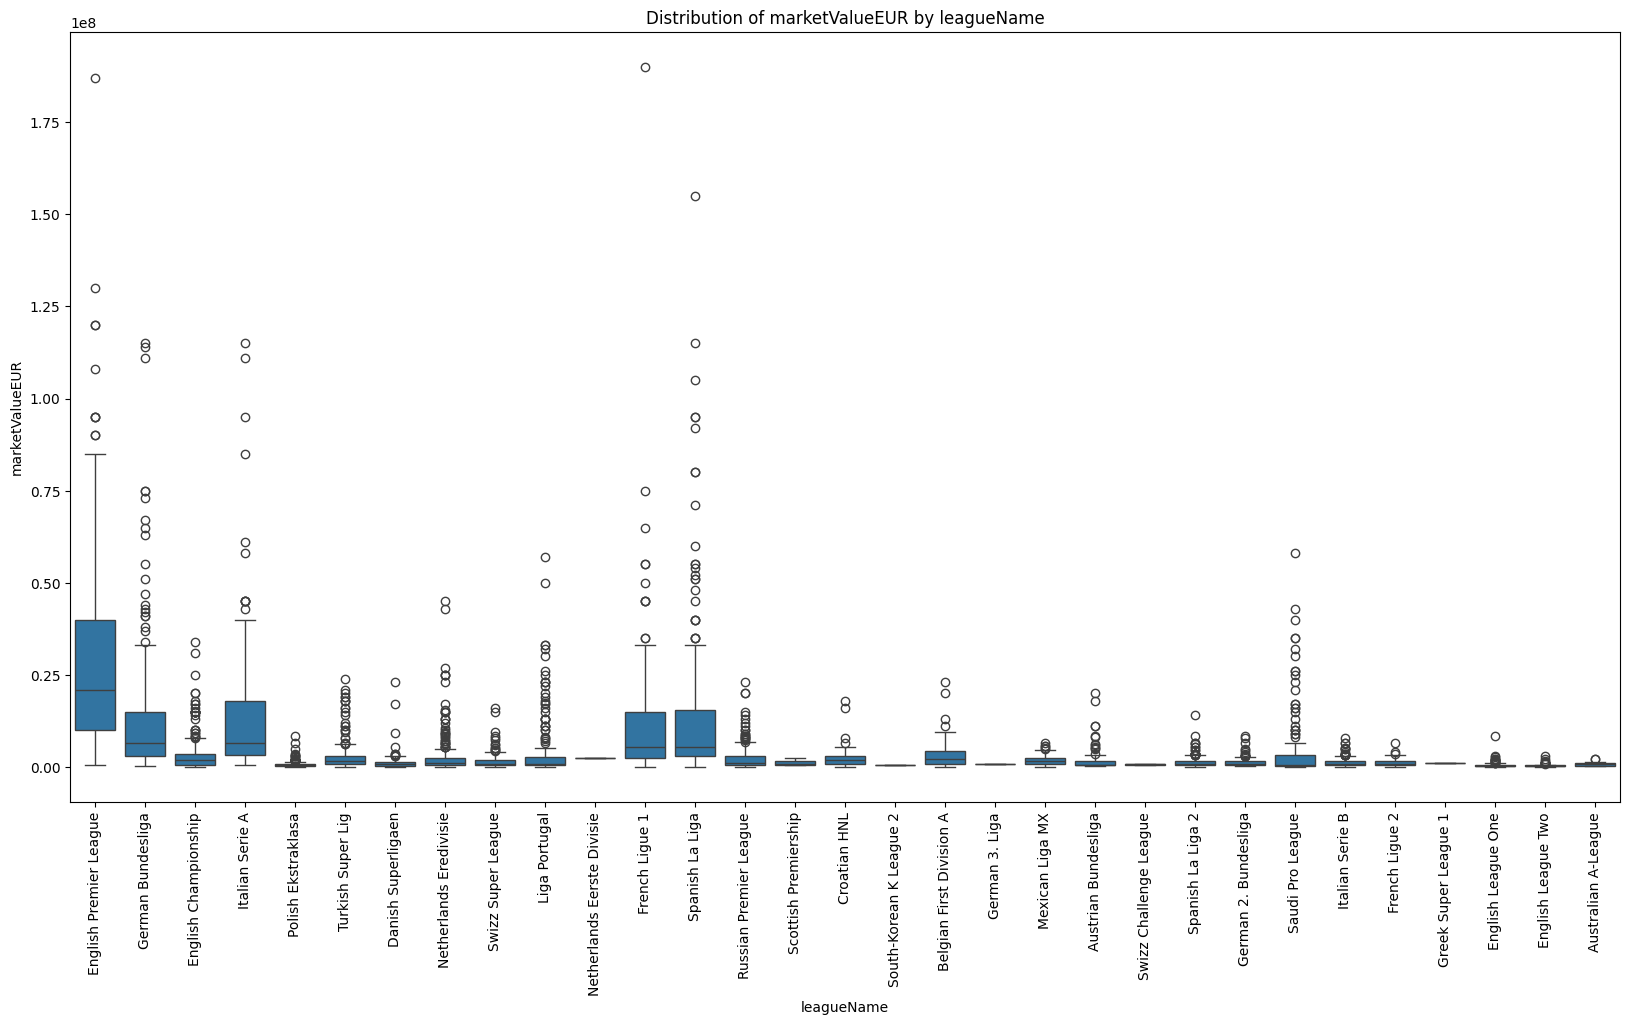

In [259]:
# Checking for outliers in our data
plt.figure(figsize=[20,10])
plt.xticks(rotation=90)
plt.title('Distribution of marketValueEUR by leagueName')
sns.boxplot(data=player_stats_final, x='leagueName', y='marketValueEUR')

# We observe that there's a huge difference in marketvalue, both within a league - but especially across leagues.

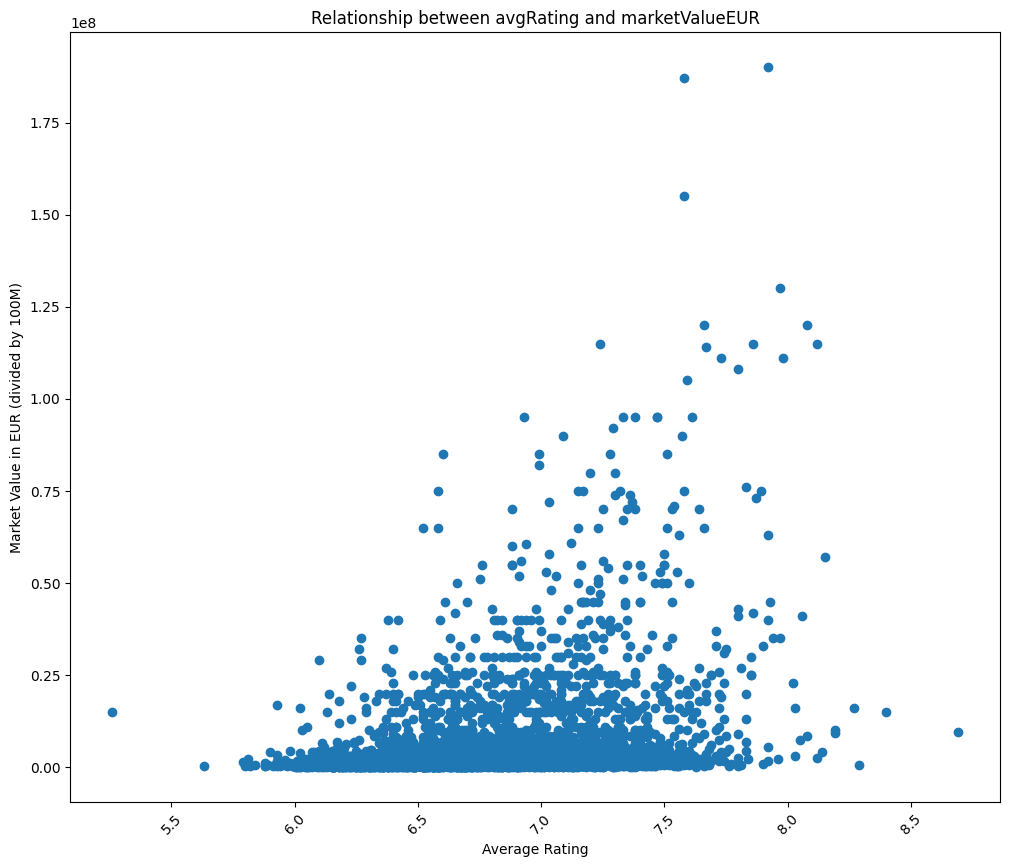

In [260]:
# Scatter plot showing the relationship between marketvalueEUR and avgRating. 
plt.figure(figsize=[12,10])
plt.xticks(rotation=45)
plt.xlabel('Average Rating')
plt.ylabel('Market Value in EUR (divided by 100M)')
plt.title('Relationship between avgRating and marketValueEUR')
plt.scatter(x='avgRating',y='marketValueEUR', data=player_stats_final)


# There seems to be a slight correlation between market value and avgRating, indicating that highly valued players receive good ratings.
# Most players seem though to have an avgRating between 6.0 and ≈ 7.7, with a marketValueEUR less than 50m Euros. 

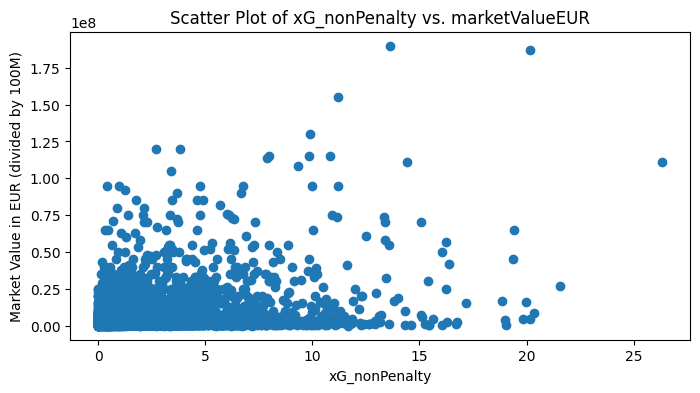

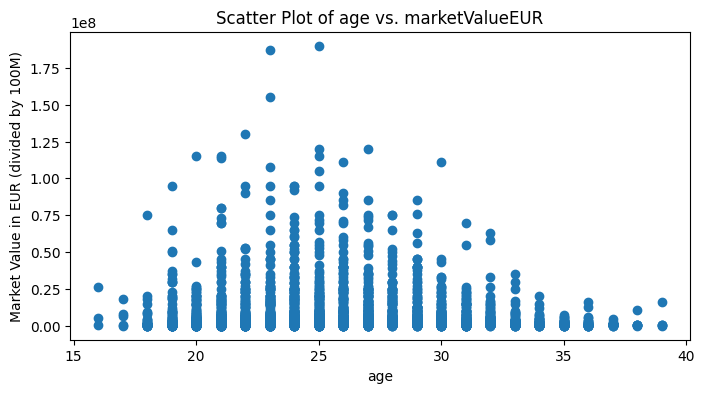

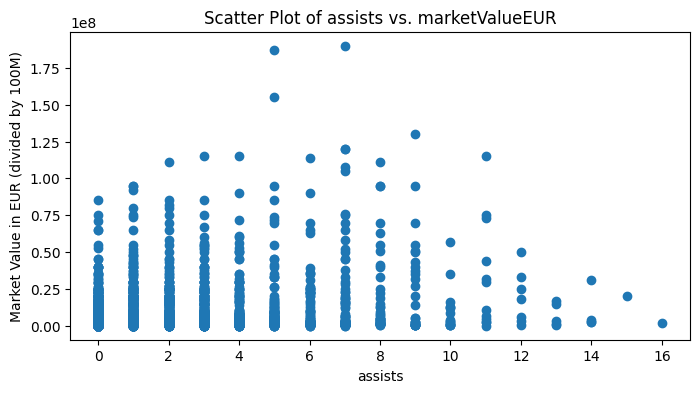

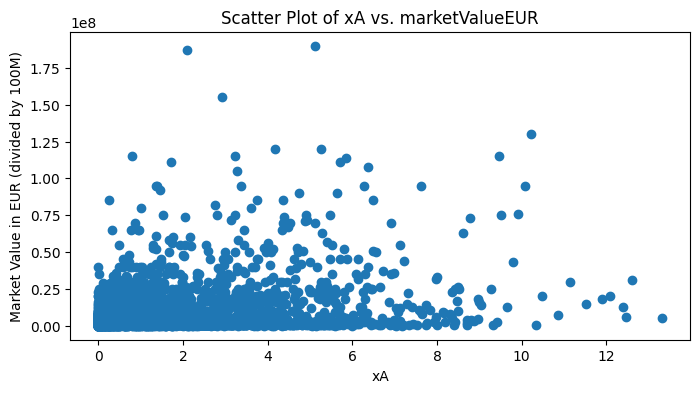

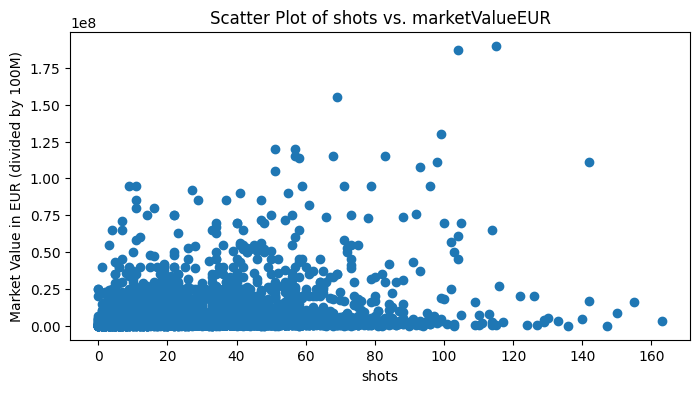

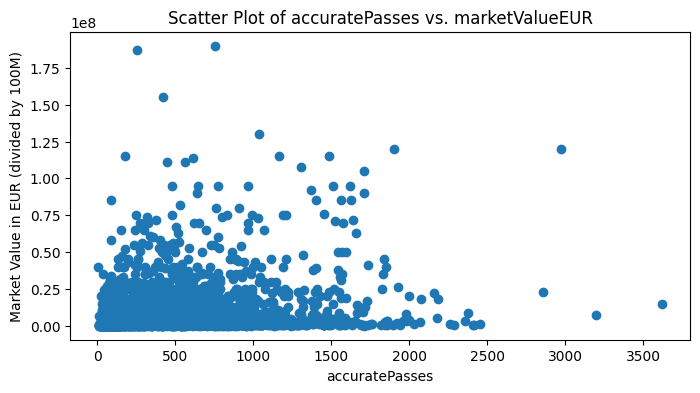

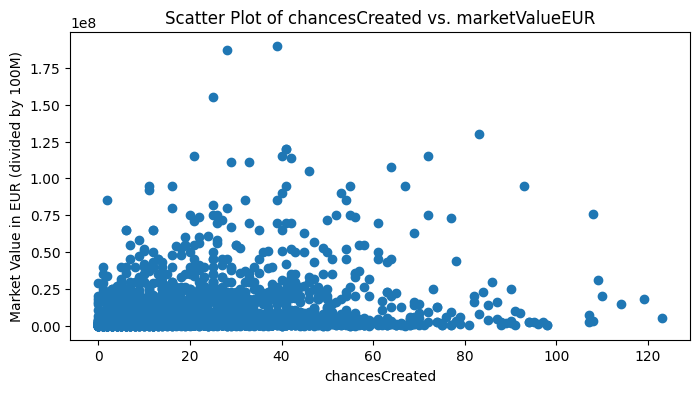

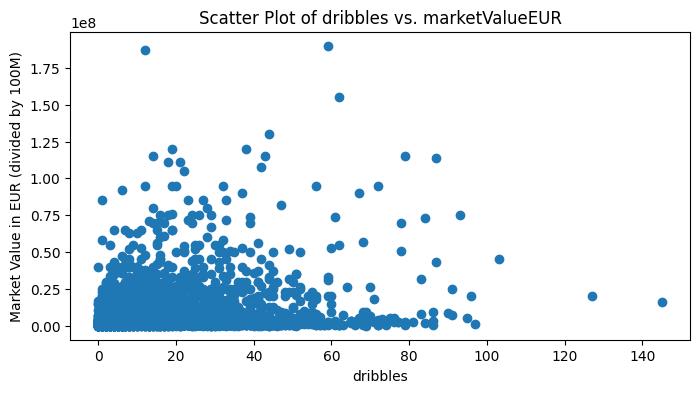

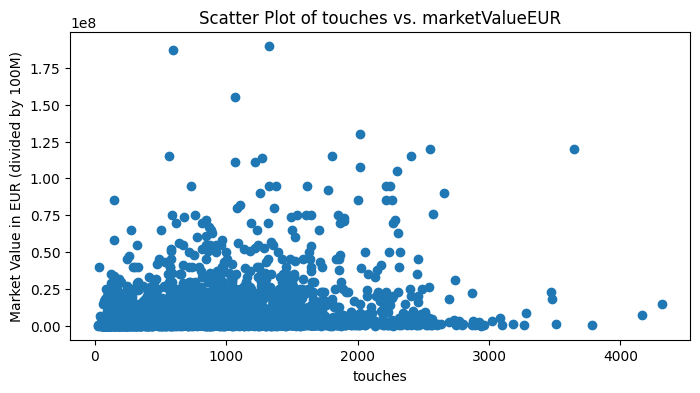

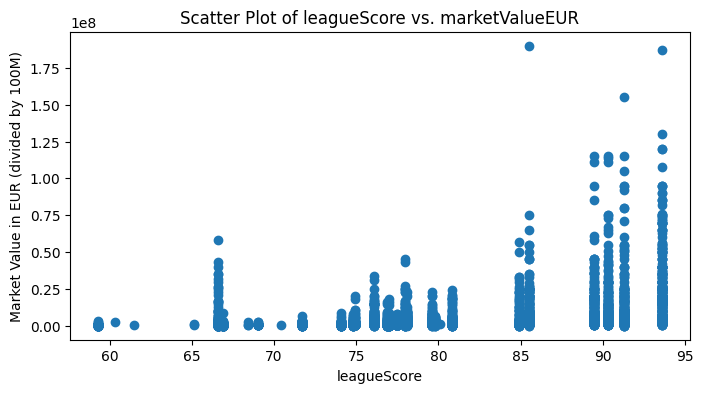

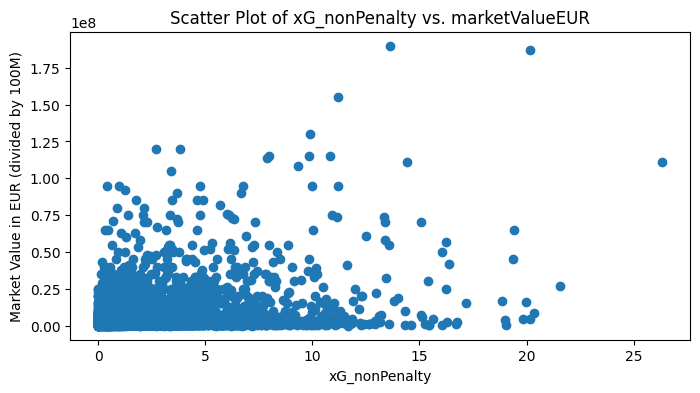

In [261]:
# To uncover any potential linear relationships between marketValueEUR and other features, we create a loop to iterate other features and create new charts. 
selected_continous = ['xG_nonPenalty','age','assists','xA','shots','accuratePasses', 'chancesCreated','dribbles','touches','leagueScore','xG_nonPenalty']

# Create scatter plots for every numeric column.
for col in selected_continous:
  plt.figure(figsize=(8, 4))
  plt.scatter(player_stats_final[col],player_stats_final['marketValueEUR'])
  plt.title(f'Scatter Plot of {col} vs. marketValueEUR')
  plt.xlabel(col)
  plt.ylabel('Market Value in EUR (divided by 100M)')


Series([], Name: count, dtype: int64)
0


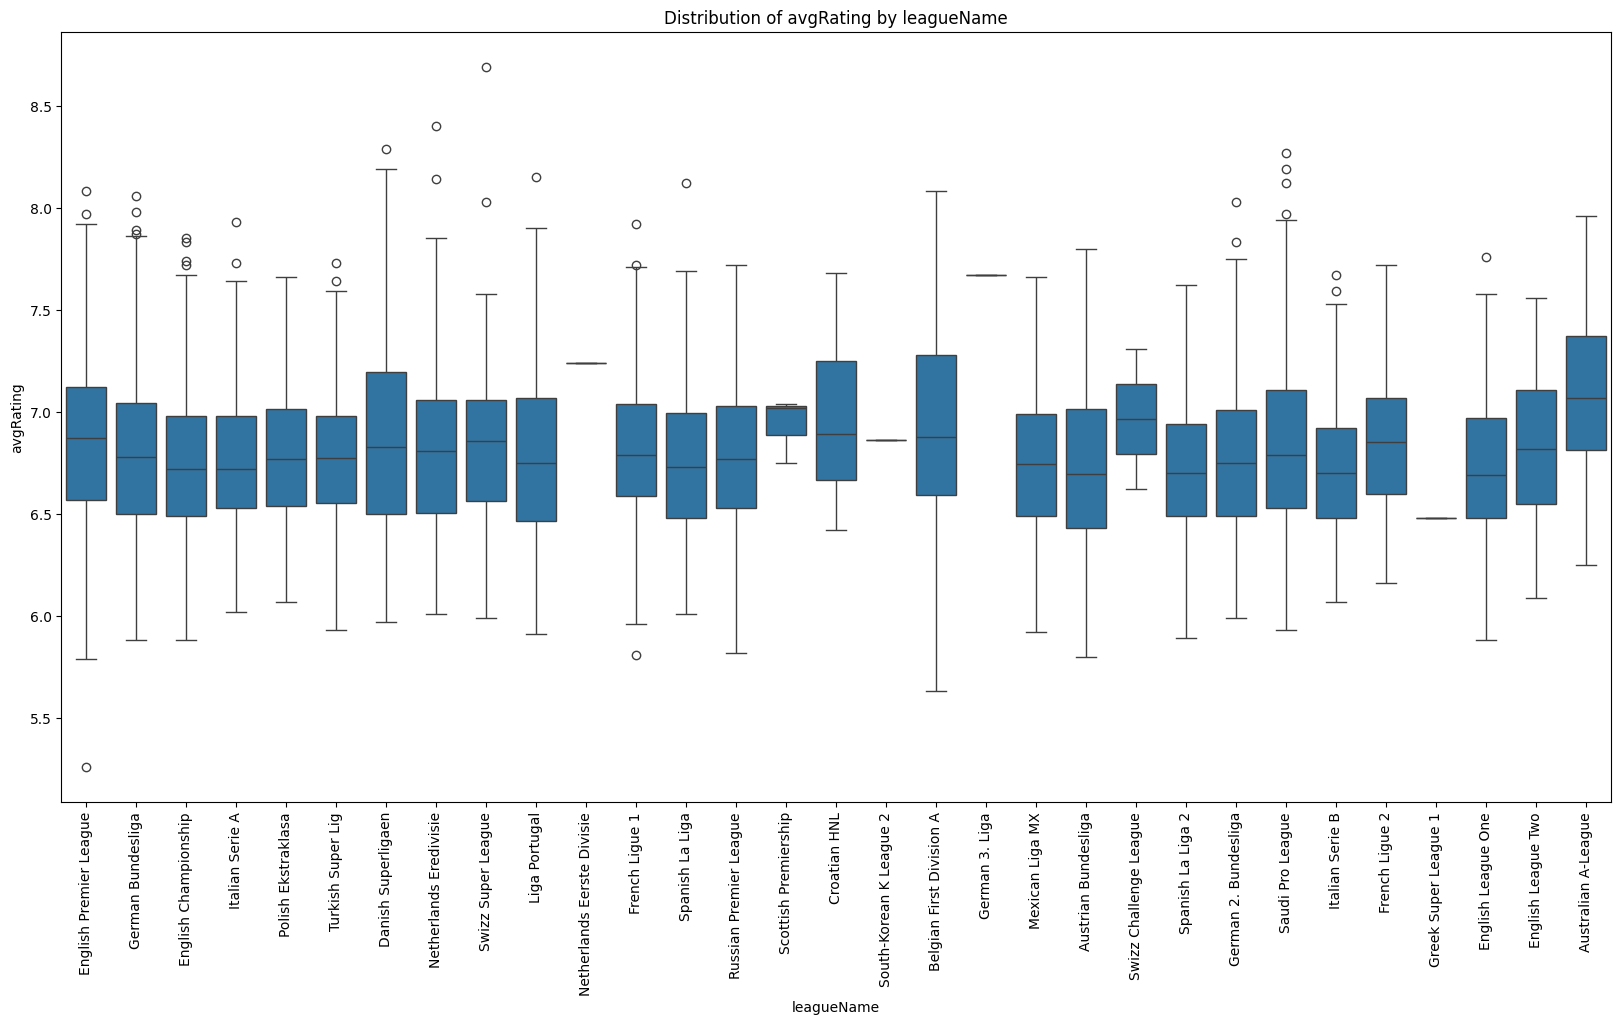

In [262]:
plt.figure(figsize=[20,10])
plt.xticks(rotation=90)
plt.title('Distribution of avgRating by leagueName')
sns.boxplot(data=player_stats_final, x='leagueName', y='avgRating')

# There seems to a pretty even distribution of ratings amongst the leagues, with a few outliers. 
#we see, however, very few datapoints for German 3. Liga, Netherlands Eerste Divisie, and South-Korean K League 2. Let's have an additional look at these leagues.

league_names_to_count = ['German 3. Liga', 'Netherlands Eerste Divisie', 'South-Korean K League 2']

# Count occurrences of each leagueId
league_counts = player_stats_final['leagueName'].value_counts()

# Filter the counts to only include the specific leagueIds
filtered_league_name_counts = counts[counts.index.isin(league_names_to_count)]

# Print the counts
print(filtered_league_name_counts)
print(filtered_league_name_counts.sum())

# All three leagues only have one player in them, so we decide to drop these three leagues to combat data imbalance. 
player_stats_final = player_stats_final[~player_stats_final['leagueName'].isin(league_names_to_count)]

/var/folders/z8/_8mthtnj5xj0lx776mdtsrpr0000gn/T/ipykernel_52092/1671455462.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=league_counts.index, y=league_counts.values, palette='viridis')


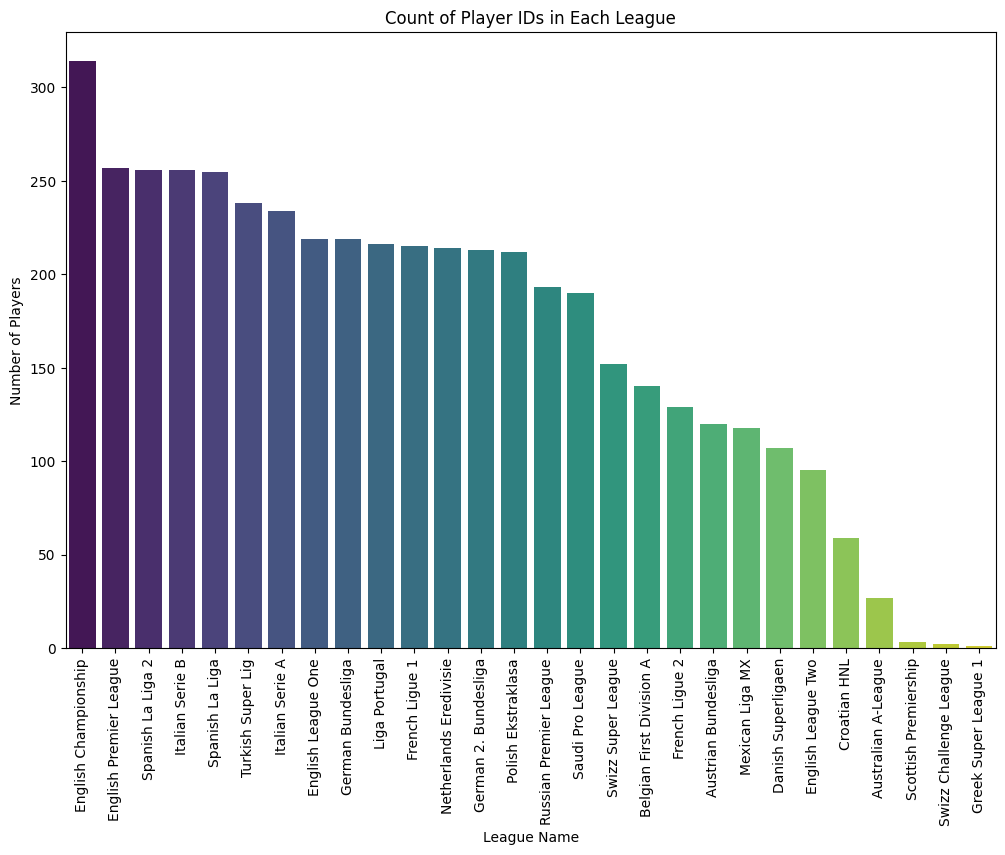

In [263]:
# Lets have a look at the distribution of players in the different leagues. 

# Count the number of players in each league
league_counts = player_stats_final['leagueName'].value_counts()

plt.figure(figsize=(12, 8))

sns.barplot(x=league_counts.index, y=league_counts.values, palette='viridis')
plt.title('Count of Player IDs in Each League')
plt.xlabel('League Name')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)  # Rotate labels to handle longer league names
plt.show()

In [264]:
# In addition to the aformentioned leagues, we see very few players in the Scottish Premiership, Swizz Challenge League, and Greek Super League 1
# We decide to drop these as well to combat data imbalance. 

league_names_to_drop = ['Scottish Premiership', 'Swizz Challenge League', 'Greek Super League 1']
player_stats_final = player_stats_final[~player_stats_final['leagueName'].isin(league_names_to_drop)]

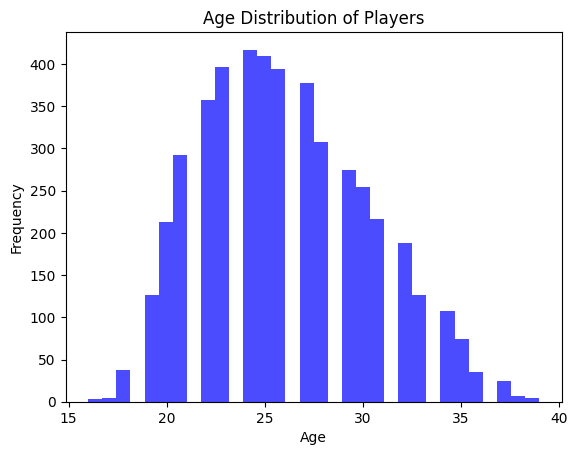

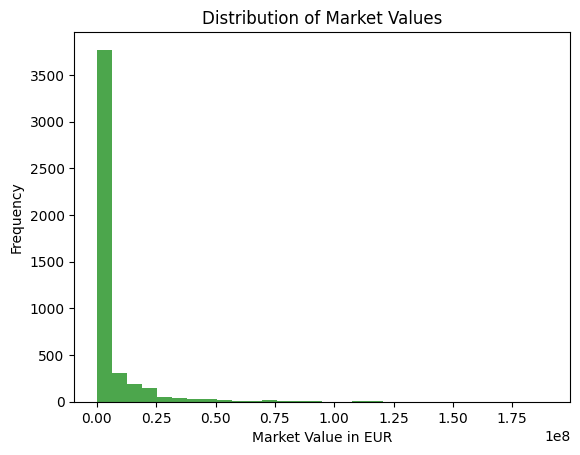

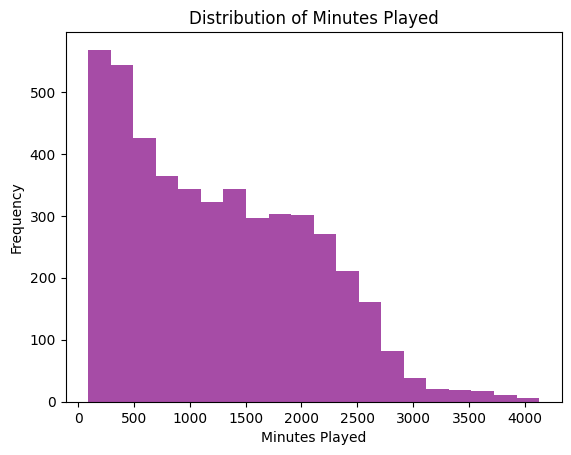

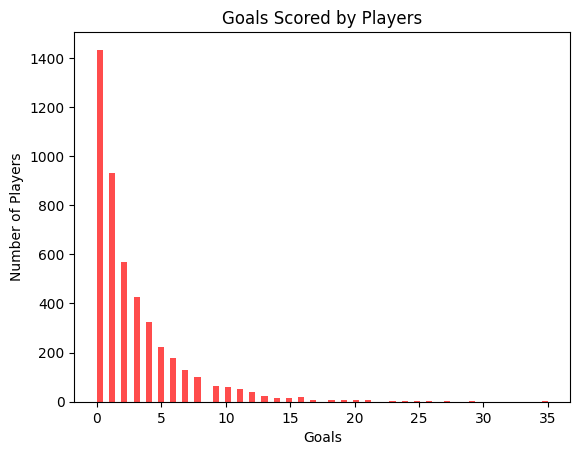

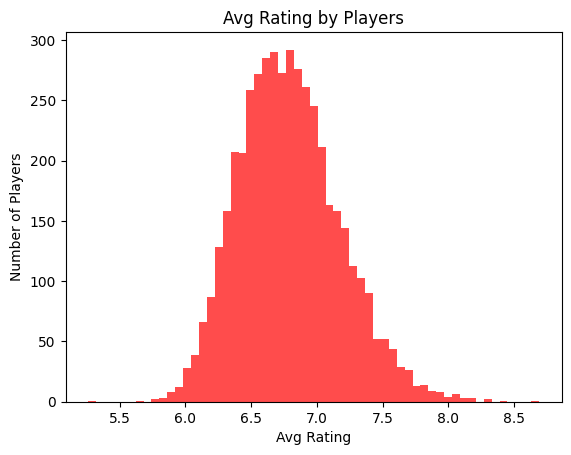

In [265]:
# Using histograms to explore the distribution of numerical data.
plt.hist(player_stats_final['age'], bins='auto', color='blue', alpha=0.7)
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.hist(player_stats_final['marketValueEUR'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Market Values')
plt.xlabel('Market Value in EUR')
plt.ylabel('Frequency')
plt.show()

plt.hist(player_stats_final['minutesPlayed'], bins=20, color='purple', alpha=0.7)
plt.title('Distribution of Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Frequency')
plt.show()

plt.hist(player_stats_final['goals'], bins='auto', color='red', alpha=0.7)
plt.title('Goals Scored by Players')
plt.xlabel('Goals')
plt.ylabel('Number of Players')
plt.show()

plt.hist(player_stats_final['avgRating'], bins='auto', color='red', alpha=0.7)
plt.title('Avg Rating by Players')
plt.xlabel('Avg Rating')
plt.ylabel('Number of Players')
plt.show()

# We see quite evenly distributed data for age and avgRating.
# The data is quite skweded for minutesPlayed and goals, with most players playing fewer minutes and scoring fewer goals, which is expected.
# The data is, however, very skewed for marketValueEUR, which needs to be taken into consideration. 


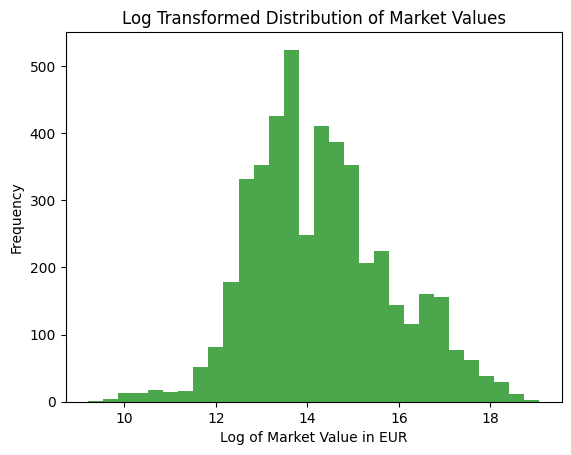

In [266]:
#As the data is so skewed for marketValueEur, we use a logarithmic transformation and create a new column
player_stats_final['marketValueEUR_log'] = np.log(player_stats_final['marketValueEUR'] + 1)


# Plotting the transformed data
plt.hist(player_stats_final['marketValueEUR_log'], bins=30, color='green', alpha=0.7)
plt.title('Log Transformed Distribution of Market Values')
plt.xlabel('Log of Market Value in EUR')
plt.ylabel('Frequency')
plt.show()

In [267]:
# Preparing dataset for ml/dl analysis

player_stats_final.dtypes

# Dropping name column columns
player_stats_final = player_stats_final.drop('name',axis = 1)

# Encoding categorical features
labelencoder = preprocessing.LabelEncoder()

player_stats_final["country"] = labelencoder.fit_transform(player_stats_final["country"])
player_stats_final["leagueName"] = labelencoder.fit_transform(player_stats_final["leagueName"])
player_stats_final["is_attacker"] = labelencoder.fit_transform(player_stats_final["is_attacker"])
player_stats_final

,playerId,marketValueEUR,country,leagueId,leagueName,goals,assists,minutesPlayed,avgRating,xG_nonPenalty,shots,xA,accuratePasses,chancesCreated,dribbles,touches,is_attacker,age,leagueScore,marketValueEUR_log
1,494597,18500000,38,47,8,4,2,2151,6.99,1.94,28,1.97,787,30,7,1353,0,28,93.6,16.733281
2,536457,6500000,9,47,8,0,0,92,6.24,0.06,4,0.19,39,1,4,82,0,27,93.6,15.687313
3,540963,23000000,91,47,8,1,1,2735,6.88,1.86,23,1.42,1175,24,18,1727,0,26,93.6,16.951005
4,623716,18000000,62,47,8,1,3,1798,7.15,0.37,12,2.18,1018,23,3,1426,0,28,93.6,16.705882
5,655575,3500000,34,47,8,5,0,1060,6.65,3.64,36,1.58,303,20,17,637,0,25,93.6,15.068274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5736,237629,950000,112,113,0,5,3,1731,6.88,8.72,57,1.17,216,19,9,530,1,32,69.0,13.764218
5737,494312,620000,5,113,0,1,4,1045,6.92,1.83,21,0.79,198,16,15,497,1,28,69.0,13.337476
5745,1037002,240000,67,113,0,2,2,1185,6.69,2.68,23,2.70,334,19,10,584,0,23,69.0,12.388398
5754,687440,350000,5,113,0,5,1,406,7.12,1.52,11,0.89,76,8,3,217,0,27,69.0,12.765691


***
## <center> Baseline model
### <center> Linear Regression
***


***
## <center> Main Model
### <center> Feed Forward Neural Network
***


In [268]:
##Code

***
## <center> Comparision Model
### <center> Deep Feed Forward Neural Network
***


In [270]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
import numpy as np
import pandas as pd

# Assuming 'MarketValue' is your target variable
features = player_stats_final.drop(['marketValueEUR_log', 'playerId', 'marketValueEUR', 'leagueId', 'is_attacker', 'country', 'leagueName', 'xG_nonPenalty','shots','xA','accuratePasses'], axis=1)
target = player_stats_final['marketValueEUR_log']

# Normalize features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Normalize target variable
target_scaler = MinMaxScaler()
target_scaled = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Splitting dataset
X_train, X_val, y_train, y_val = train_test_split(features_scaled, target_scaled, test_size=0.2, random_state=42)


def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    for i in range(hp.Int('num_layers', 1, 3)):  # Number of hidden layers
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(
        optimizer=Adam(
            hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')),
        loss='mean_squared_error',
        metrics=['mae'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=15,
    executions_per_trial=1,
    directory='my_dir',
    project_name='market_value_regression')

tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))




Trial 20 Complete [00h 00m 19s]
val_mae: 0.0758000835776329

Best val_mae So Far: 0.0758000835776329
Total elapsed time: 00h 05m 54s
Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0410 - mae: 0.1442 - val_loss: 0.0146 - val_mae: 0.0886
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0157 - mae: 0.0978 - val_loss: 0.0152 - val_mae: 0.0918
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0150 - mae: 0.0943 - val_loss: 0.0198 - val_mae: 0.1073
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0148 - mae: 0.0936 - val_loss: 0.0190 - val_mae: 0.1048
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0140 - mae: 0.0915 - val_loss: 0.0163 - val_mae: 0.0960
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0130 - mae: 0.0880 - val_loss: 0.0154 - val_mae: 0.0924
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0123 - mae: 0.0854 - val_loss: 0.0171 - val_mae: 0.0980
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0

*** 
### Testing 
***

In [279]:


# Assuming scaler and model are defined and trained appropriately
player_data = {
	'goals': [5],
    'assists': [5],
    'minutesPlayed': [2000],
    'avgRating': [7.55],
    #'xG_nonPenalty': [10.34],
    #'shots': [50],
    #'xA': [7.94],
    #'accuratePasses': [800],
    'chancesCreated': [80],
    'dribbles': [100],
    'touches': [1000],
    'age': [20],
    'leagueScore': [90.6]
}
																	
# Convert to DataFrame
player_df = pd.DataFrame(player_data)

# Normalize numerical fields
#numerical_fields = ['goals', 'assists', 'minutesPlayed', 'avgRating', 'xG_nonPenalty', 'shots', 'xA', 
#                   'accuratePasses', 'chancesCreated', 'dribbles', 'touches', 'age', 'leagueScore']

# Normalize numerical fields
numerical_fields = ['goals', 'assists', 'minutesPlayed', 'avgRating', 
                    'chancesCreated', 'dribbles', 'touches', 'age', 'leagueScore']

player_df[numerical_fields] = scaler.transform(player_df[numerical_fields])

# Ensure input features exactly match those during training (without 'leagueName')
input_features = player_df 

# Make a prediction
predicted_value_scaled = model.predict(input_features)

# Invert the scaling of the target variable
predicted_value_log = target_scaler.inverse_transform(predicted_value_scaled)

#invert the log transformation
predicted_value = np.exp(predicted_value_log)

print(f"Predicted Market Value: €{predicted_value[0][0]:,.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Market Value: €48,187,072.00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

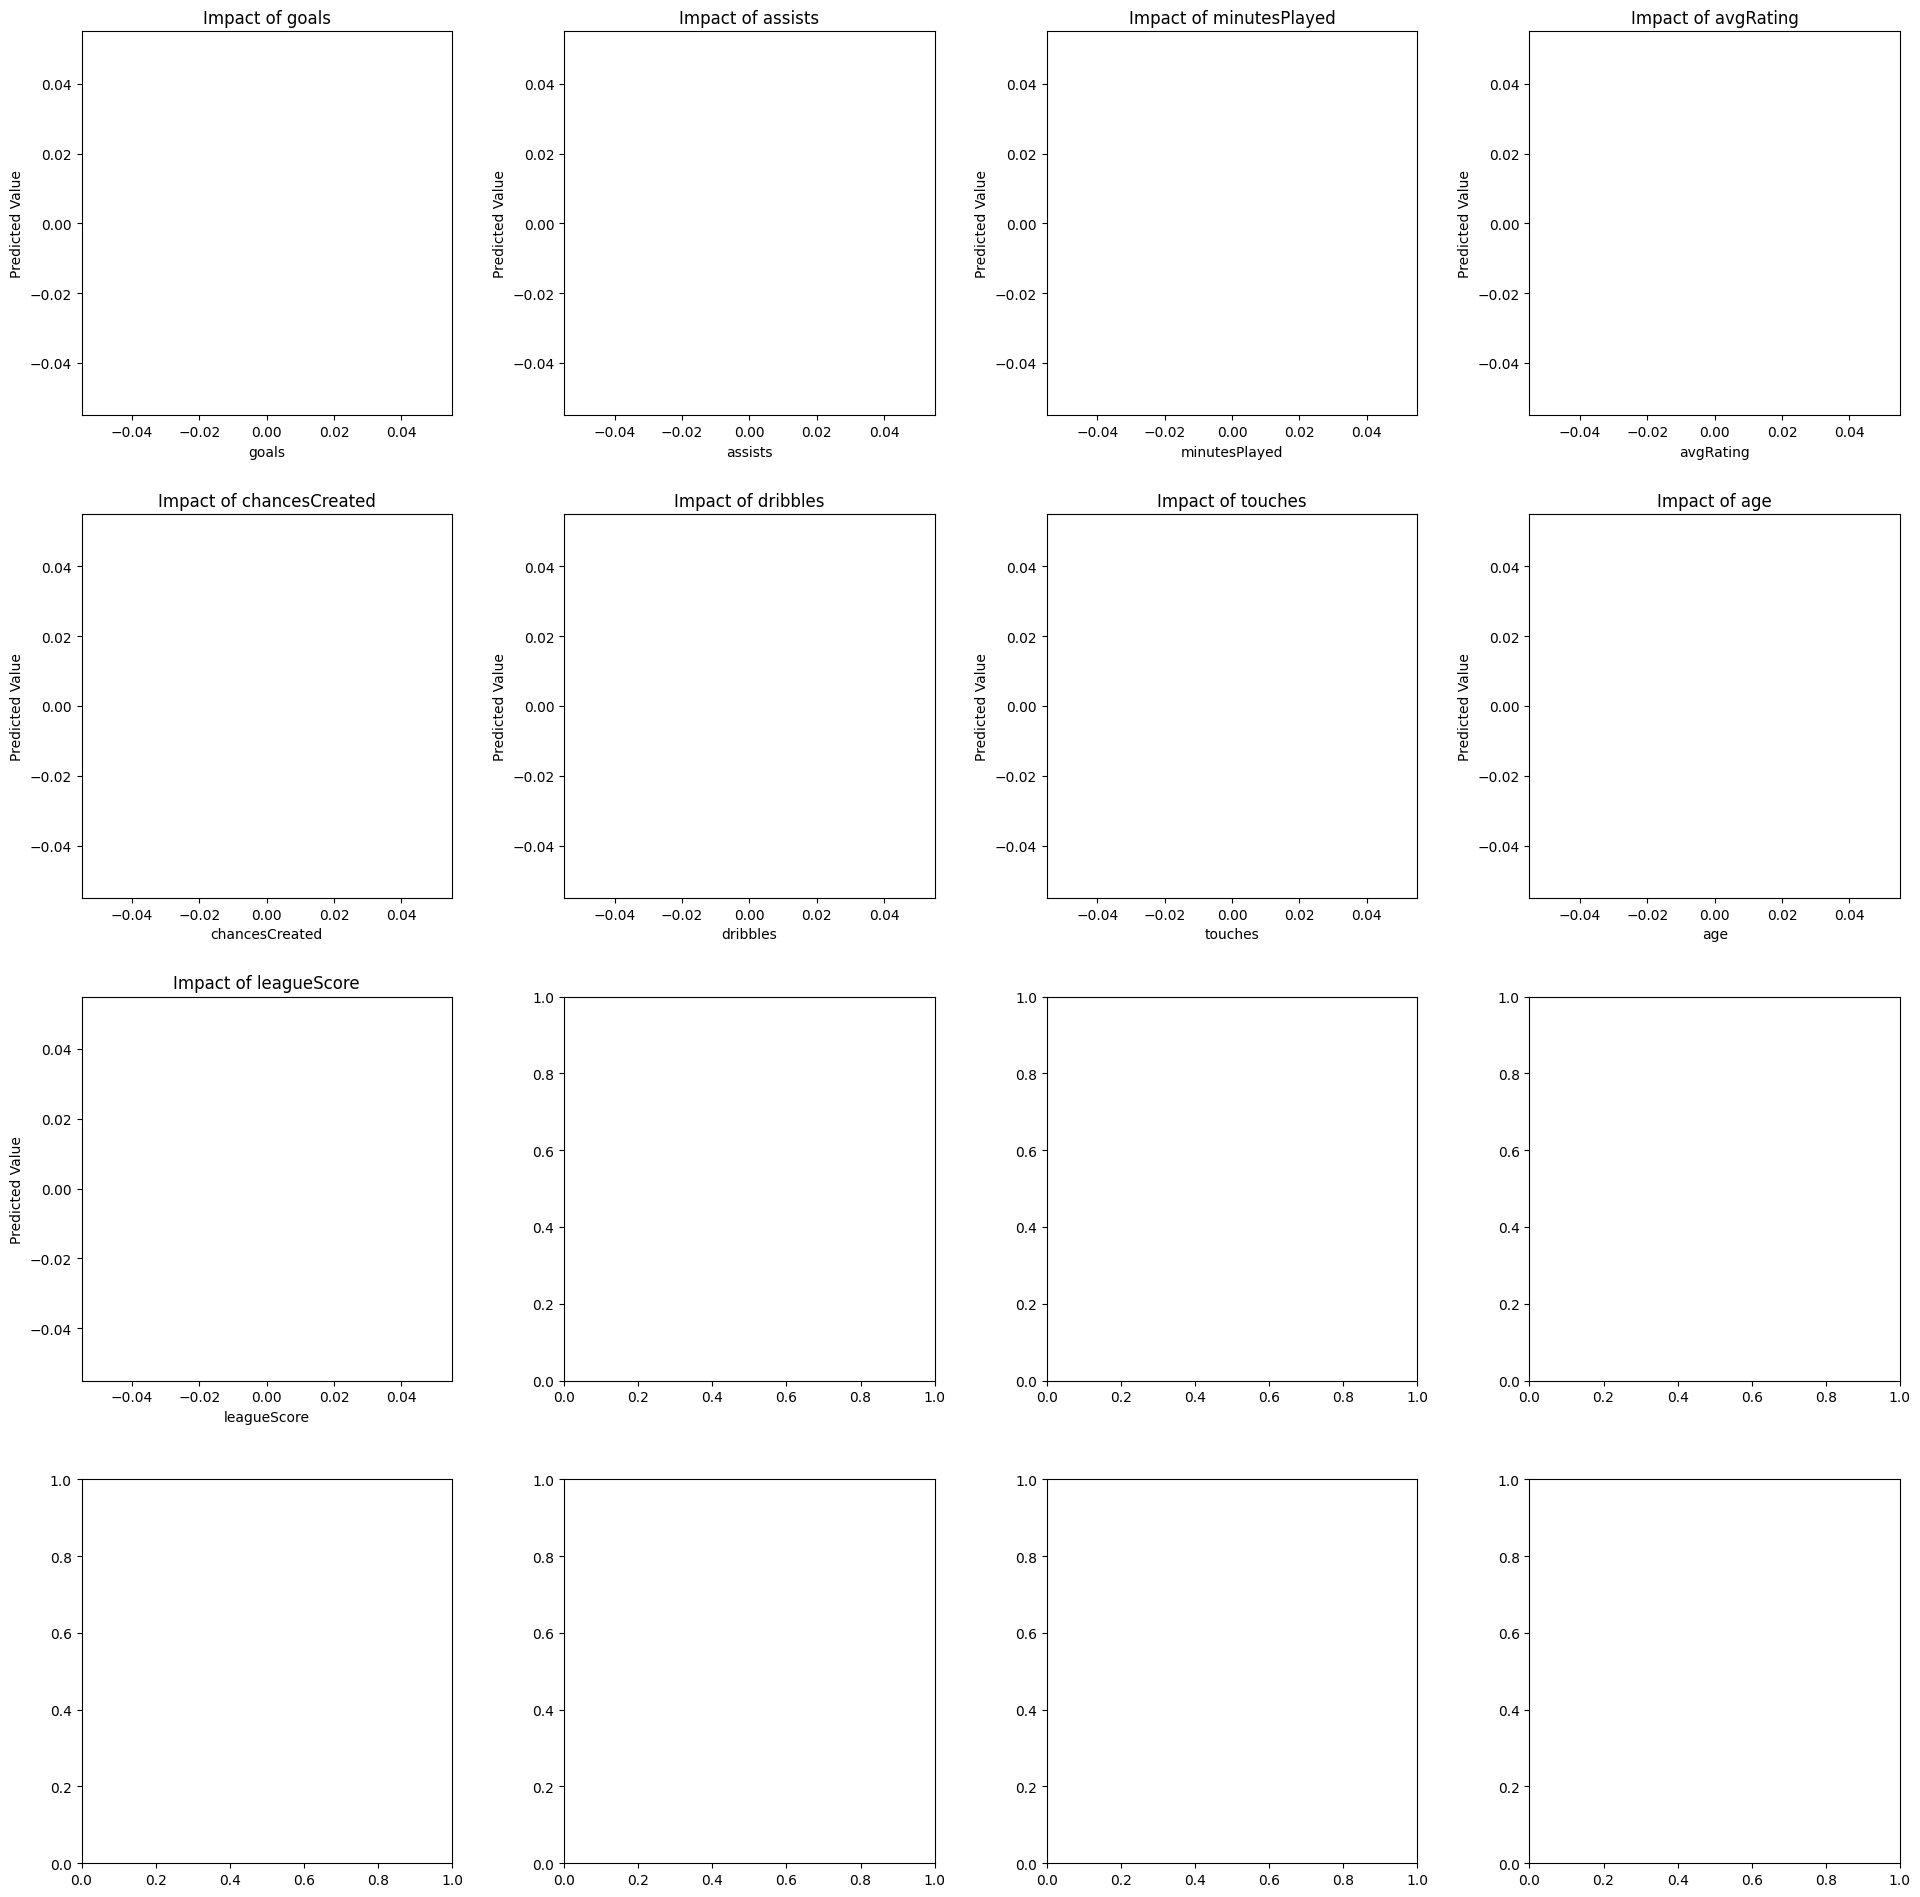

In [272]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler  # Assuming this is your scaler

# Assuming scaler and model are properly initialized and fitted
test_data = player_df.copy()
median_values = test_data.median()

# Scale median values once to use as a baseline
test_data.loc[:] = median_values
scaled_data = scaler.transform(test_data)

# Create plots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.tight_layout(pad=5.0)

for i, feature in enumerate(test_data.columns):
    ax = axes[i // 4, i % 4]
    feature_values = np.linspace(player_df[feature].min(), player_df[feature].max(), 30)
    predicted_values = []

    for value in feature_values:
        temp_data = scaled_data.copy()
        temp_data[0][i] = scaler.transform(median_values.to_frame().T.assign(**{feature: value}))[0][i]
        predicted_value = model.predict(temp_data)
        predicted_values.append(predicted_value[0][0])
    
    # Debugging output
    print(f"Feature '{feature}' predictions: {predicted_values}")

    ax.plot(feature_values, predicted_values)
    ax.set_title(f'Impact of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Predicted Value')

plt.show()
